## Exercise 10 - Decision tree

- Use the same dataset as in previous exercises (ex08 and ex09) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called decision tree for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. Filter dataframe for meanfun and IQR columns only.

In [1]:
from sklearn import metrics, tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
voice_data = pd.read_csv("voice.csv")
#voice_data

In [3]:
X = voice_data.to_numpy()[:, [12, 5]].astype(float)
#X

2 Divide the data with the following portions:
   - Training data 70 %
   - Test data 30 %

In [4]:
x = voice_data[["meanfun", "IQR"]]
y = voice_data["label"]

feature_names = x.columns
labels = y.unique()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

3 Define classifier without the max_depth parameter. Use get_depth() method for the defined classifier. What value for tree depth was chosen automatically?

In [6]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)
clf.get_depth()

15

4 Visualise the tree structure and create the confusion matrix where you can compare true and predicted labels.

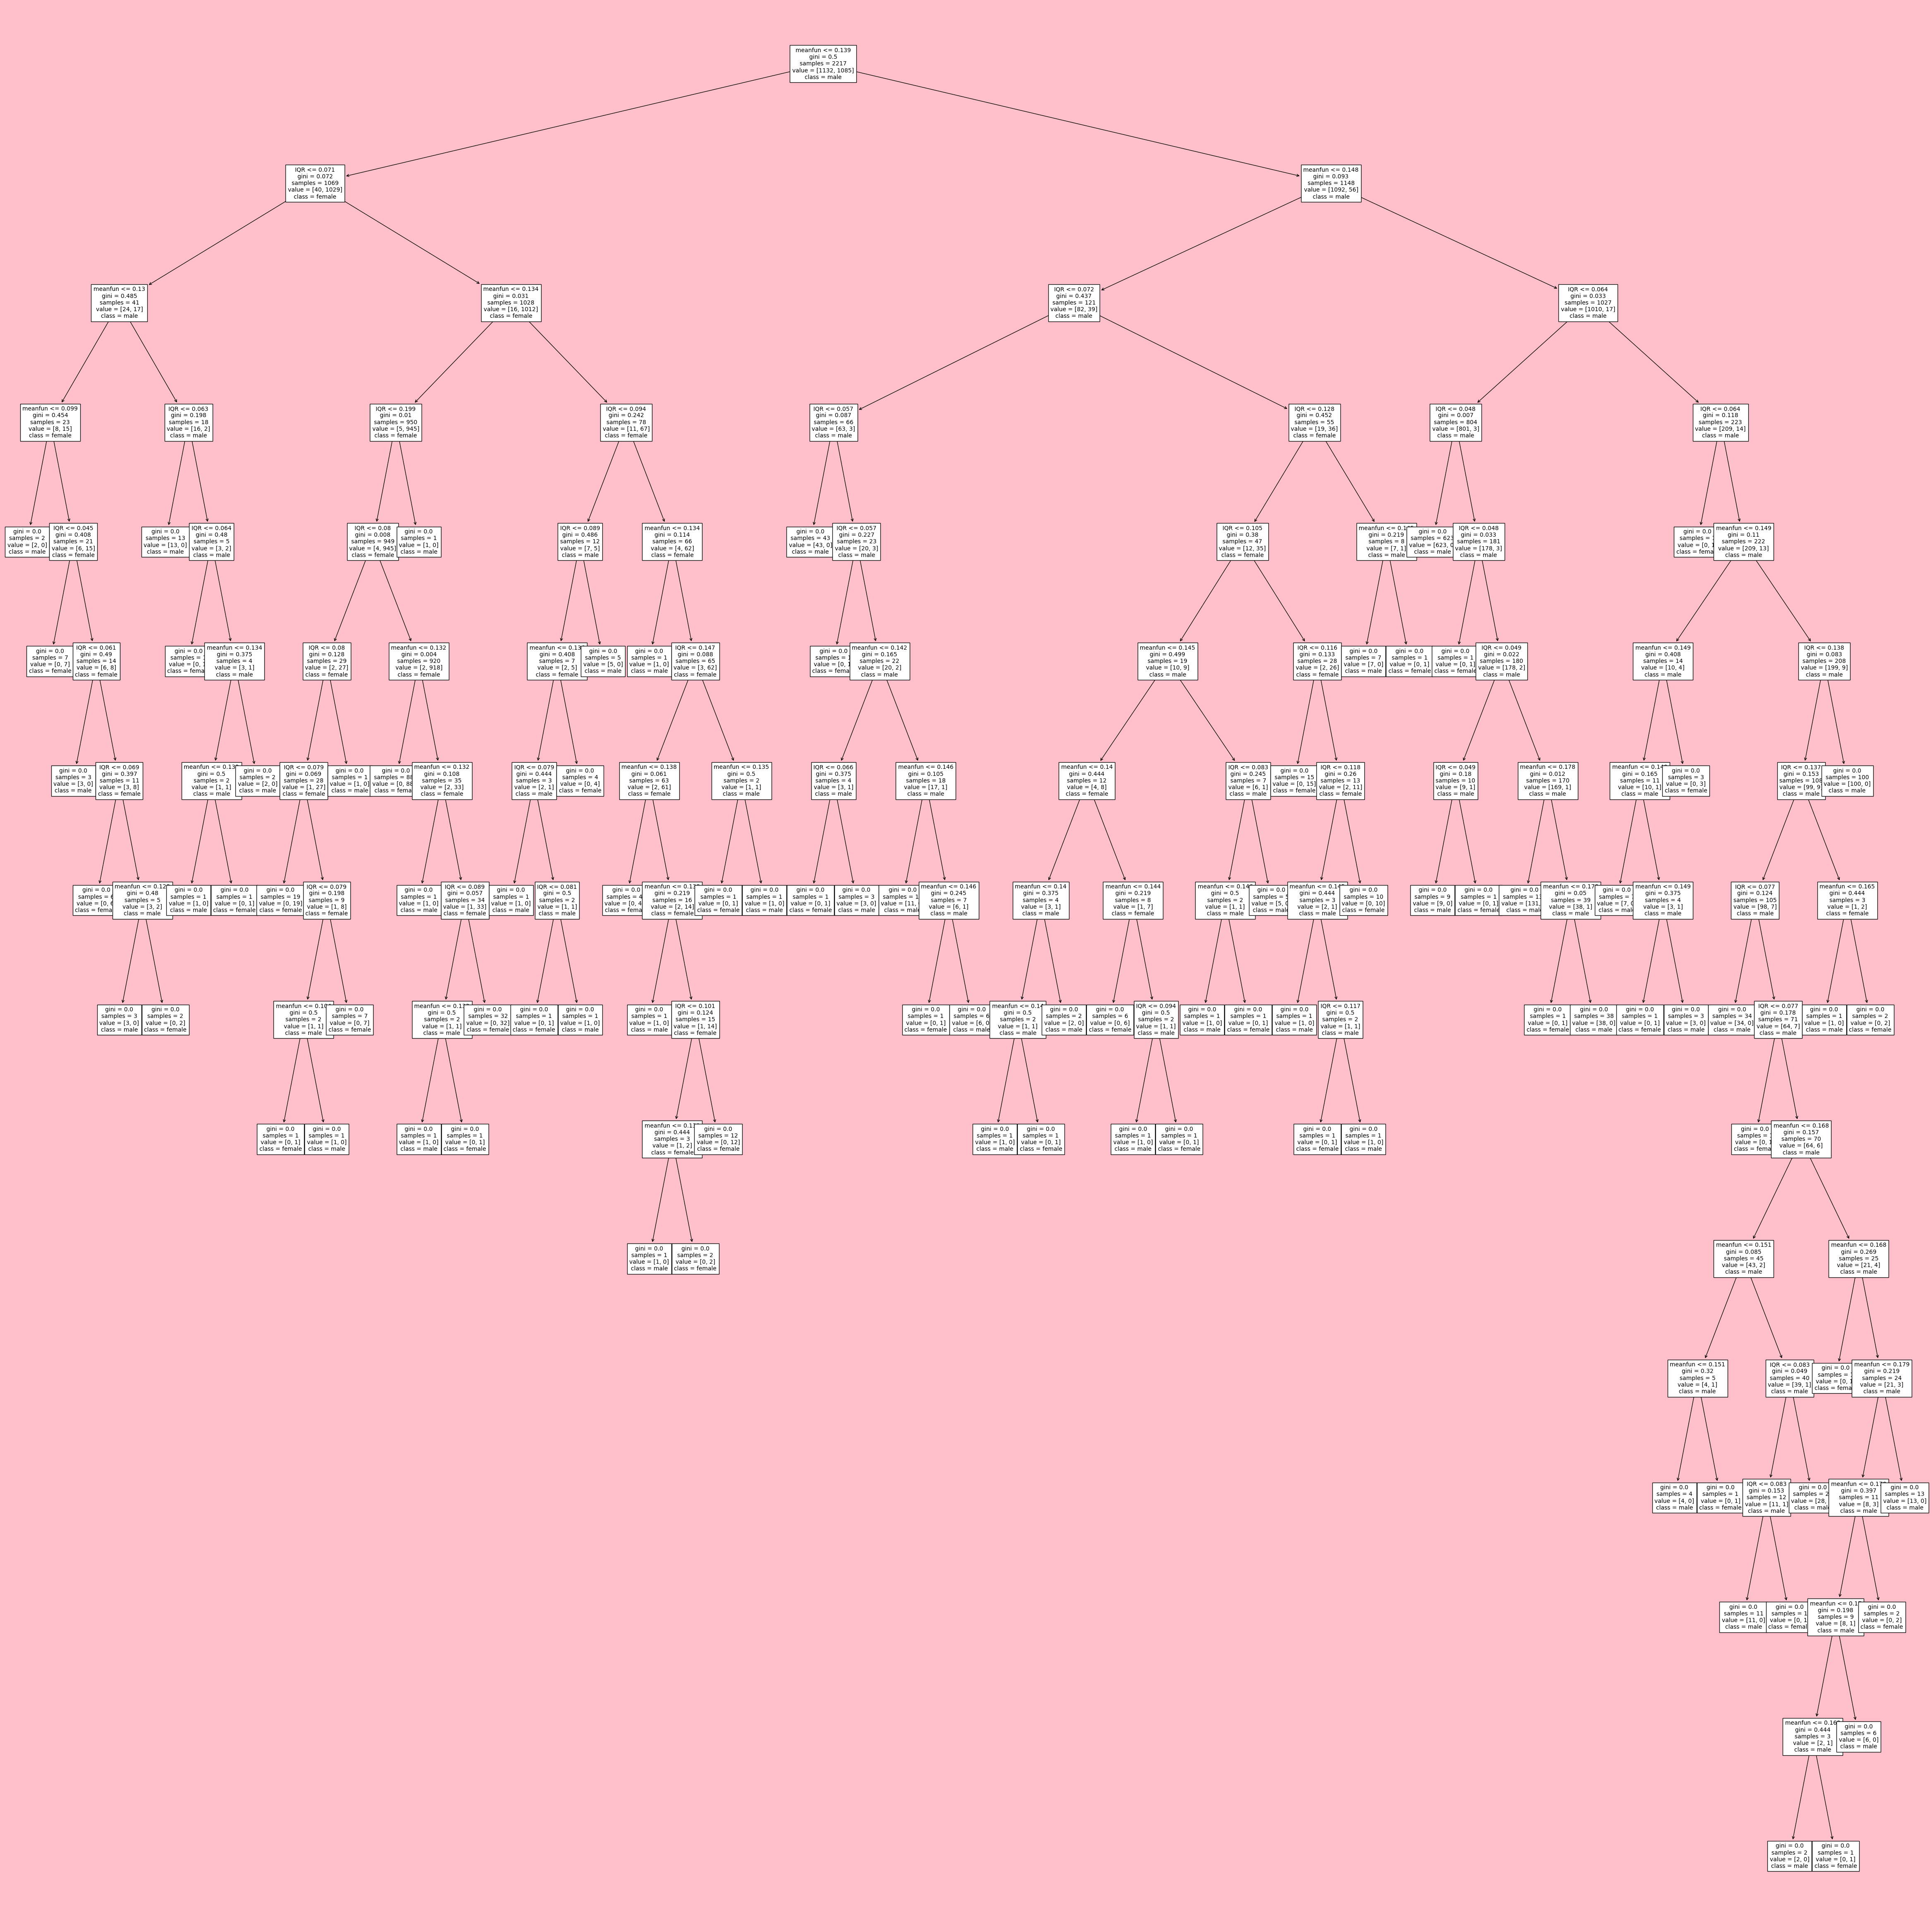

In [7]:
plt.figure(figsize = (60,60), facecolor = 'pink')

a = tree.plot_tree(clf, feature_names = feature_names, class_names = labels, fontsize = 10)
plt.show()

In [8]:
test_pred_decision_tree = clf.predict(x_test)

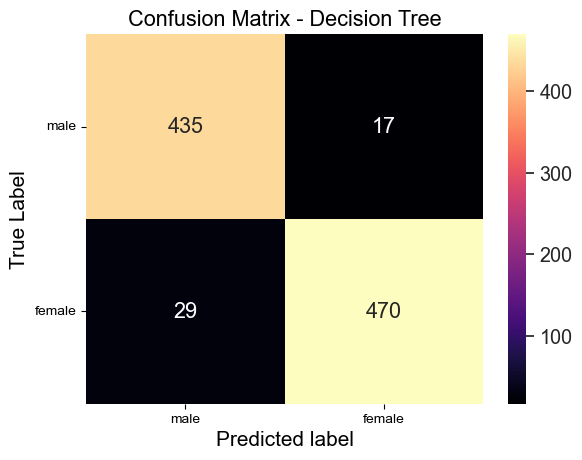

<Figure size 1000x700 with 0 Axes>

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma")

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels([''] + labels)
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()